In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from scipy.stats import norm 
from tabulate import tabulate

from iexfinance.stocks import get_historical_data
from iexfinance.stocks import Stock
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [18]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

#Glimpse of Data
stock_prices.head(20)

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243
5,05-05-2014,248,64,502,300,67,5646,606,244,80,239
6,12-05-2014,253,68,508,324,75,6041,596,269,84,244
7,19-05-2014,244,83,528,344,86,6394,567,299,82,289
8,26-05-2014,234,82,563,339,84,6709,593,296,81,241
9,02-06-2014,268,89,561,364,104,7453,582,338,83,259


In [19]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_')

In [20]:
stock_prices.tail()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14
313,30-03-2020,633,75,284,379,23,17546,352,82,3,14


In [21]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [22]:
stock_prices['Date'] = [pd.to_datetime(d) for d in stock_prices['Date']]

Text(0.5, 1.0, 'INFOSYS Stock Price 31/3/2014 - 30/3/2020')

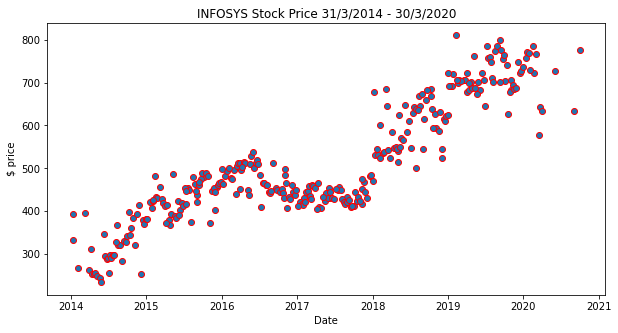

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Infosys'], edgecolors='r')
#plt.plot(stock_prices.index, stock_prices['Adj_Close'])
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("INFOSYS Stock Price 31/3/2014 - 30/3/2020")

Text(0.5, 1.0, 'Mahindra_&_Mahindra Stock Price 31/3/2014 - 30/3/2020')

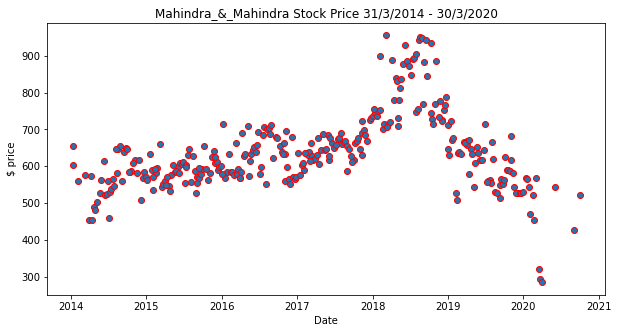

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Mahindra_&_Mahindra'], edgecolors='r')
#plt.plot(stock_prices.index, stock_prices['Adj_Close'])
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Mahindra_&_Mahindra Stock Price 31/3/2014 - 30/3/2020")

In [26]:
np.log(stock_prices.drop(['Date'],axis=1)).diff(axis = 0, periods = 1) 

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846
...,...,...,...,...,...,...,...,...,...,...
309,0.009649,-0.110348,0.030305,-0.057580,-0.087011,0.023688,0.072383,-0.053346,-0.287682,-0.127833
310,-0.139625,-0.051293,-0.093819,-0.145324,-0.095310,-0.081183,-0.043319,-0.187816,0.693147,-0.200671
311,-0.094207,-0.236389,-0.285343,-0.284757,-0.105361,-0.119709,-0.050745,-0.141830,-0.693147,-0.117783
312,0.109856,-0.182322,-0.091269,-0.173019,-0.251314,-0.067732,-0.076851,-0.165324,0.000000,-0.133531


In [27]:
stock_returns=np.log(stock_prices.drop(['Date'],axis=1)).diff(axis = 0, periods = 1) 

In [28]:
stock_returns.shape

(314, 10)

### Calculating stock means

In [29]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.002794
Indian_Hotel           0.000266
Mahindra_&_Mahindra   -0.001506
Axis_Bank              0.001167
SAIL                  -0.003463
Shree_Cement           0.003681
Sun_Pharma            -0.001455
Jindal_Steel          -0.004123
Idea_Vodafone         -0.010608
Jet_Airways           -0.009548
dtype: float64

### Calculating stock Standard Deviation

In [32]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys                0.035070
Indian_Hotel           0.047131
Mahindra_&_Mahindra    0.040169
Axis_Bank              0.045828
SAIL                   0.062188
Shree_Cement           0.039917
Sun_Pharma             0.045033
Jindal_Steel           0.075108
Idea_Vodafone          0.104315
Jet_Airways            0.097972
dtype: float64

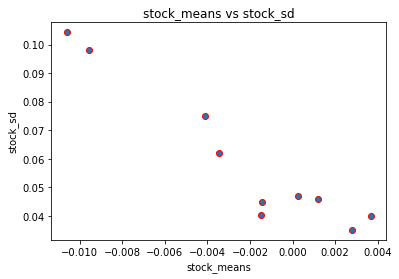

In [33]:
plt.scatter(stock_means, stock_sd, edgecolors='r')
plt.xlabel('stock_means')
plt.ylabel('stock_sd')
plt.title('stock_means vs stock_sd')
plt.show()

Stock with a lower mean & higher standard deviation does not play a role in a portfolio that has competing stock with more returns & less risk.
Thus for the data we have here, we are only left few stocks:
- One with highest return and lowest risk &
- One with lowest risk and highest return